In [1]:
from helper_script import create_tensorboard_callback, save_model, plot_loss_curves

In [2]:
# Creating training set and test directory paths

train_dir = "images/train"
test_dir = "images/test"

In [3]:
train_dir = "images/train"
test_dir = "images/test"
validation_dir = "images/validate"

import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                crop_to_aspect_ratio=False)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                shuffle=False,
                                                               crop_to_aspect_ratio=False)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(validation_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                shuffle=False,
                                                                     crop_to_aspect_ratio=False)

Found 3336 files belonging to 4 classes.
Found 401 files belonging to 4 classes.
Found 401 files belonging to 4 classes.


In [4]:
# Checking out the class names
train_data.class_names

['Alto 2015', 'Hero Dash 2016', 'Toyota Aqua 2014', 'Wagon R Stingray 2018']

In [8]:
# 1. Create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB6(include_top = False)

# 2. Freeze the base model (the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

# 4. If using a model like ResNet50V2 you will need to normalize inputs (you don't have to for EfficientNet(s))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Avergae pool the outputs of the base model (aggregate all the most important information, reduce the number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation = "softmax", name = "output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_1 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 10. Fit the model and save its history
history_1 = model_1.fit(train_data,
                        epochs = 7,
                        steps_per_epoch = len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                experiment_name = "EfficientNetB6")])

Shape after passing inputs through base model: (None, 7, 7, 2304)
Shape after GlobalAveragePooling2D: (None, 2304)
Saving TensorBoard log files to: transfer_learning/EfficientNetB6/20220628-215958
Epoch 1/7
105/105 [==============================] - 196s 2s/step - loss: 0.5012 - accuracy: 0.8243 - val_loss: 0.2502 - val_accuracy: 0.9352
Epoch 2/7
105/105 [==============================] - 180s 2s/step - loss: 0.2527 - accuracy: 0.9218 - val_loss: 0.1802 - val_accuracy: 0.9551
Epoch 3/7
105/105 [==============================] - 180s 2s/step - loss: 0.1960 - accuracy: 0.9436 - val_loss: 0.1555 - val_accuracy: 0.9551
Epoch 4/7
105/105 [==============================] - 180s 2s/step - loss: 0.1665 - accuracy: 0.9562 - val_loss: 0.1359 - val_accuracy: 0.9651
Epoch 5/7
105/105 [==============================] - 180s 2s/step - loss: 0.1402 - accuracy: 0.9619 - val_loss: 0.1271 - val_accuracy: 0.9651
Epoch 6/7
105/105 [==============================] - 180s 2s/step - loss: 0.1288 - accuracy: 

In [9]:
# Evaluate on the full test dataset
model_1.evaluate(test_data)

13/13 [==============================] - 19s 1s/step - loss: 0.1070 - accuracy: 0.9676


[0.10695373266935349, 0.967581033706665]

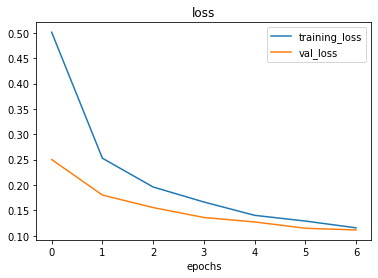

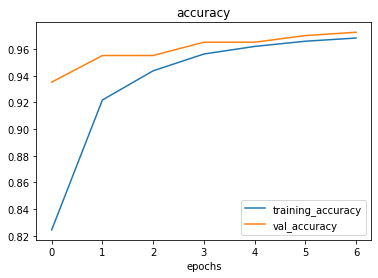

In [10]:
# Checking the model's training curves
plot_loss_curves(history_1)

In [ ]:
save_model(model_1, "feature_extraction_efficientnetB6")